In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [3]:
training_x = torch.tensor([
    [16., 4.],
    [1.,  4.],
    [16., 3.]
])

training_y = torch.tensor([
    [98.],
    [81.],
    [26.]
])

In [4]:
testing_x = torch.tensor([
    [1., 3.]
])

testing_y = torch.tensor([
    [3.]
])

In [5]:
dataset = TensorDataset(training_x, training_y)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

In [6]:
class ANNModeler(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANNModeler, self).__init__()
        self.linear1 = nn.Linear(input_size, 2, bias=True)
        self.linear2 = nn.Linear(2, output_size, bias=True)

    def forward(self, x):
        out = self.linear1(x)
        return self.linear2(out)

In [7]:
losses = []
model = ANNModeler(2, 1).to(device)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.000001)

print(model)

ANNModeler(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [8]:
epochs = 1000

for epoch in range(epochs):
    total_loss = 0
    
    for (x, y) in train_loader:
        x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)

        model.zero_grad()

        y_hat = model(x)

        loss = loss_function(y, y_hat)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    losses.append(total_loss)

C:\Users\HashTable\AppData\Local\Temp\ipykernel_18900\1165227944.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)


In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_losses(ax, t, losses):
    ax.plot(t, losses)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")

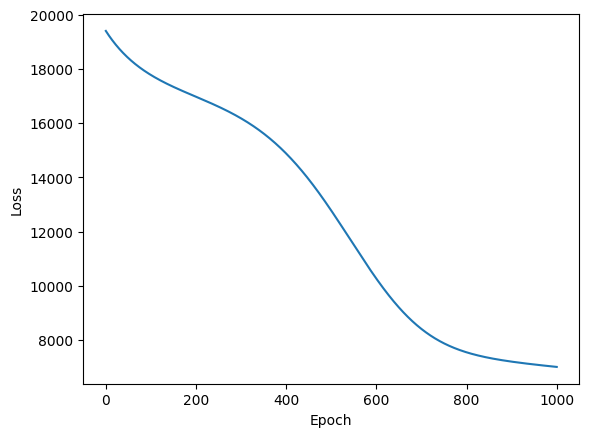

In [11]:
fig, ax = plt.subplots()
plot_losses(ax, np.linspace(0., len(losses), len(losses)), losses)

In [12]:
for x, y in zip(testing_x, testing_y):
    # Get predicted vector
    pred = model(torch.tensor(x).to(device))

    print(f"y_true: {int(y.item())}, y_hat: {int(pred.item())}")

y_true: 3, y_hat: 11


C:\Users\HashTable\AppData\Local\Temp\ipykernel_18900\76514697.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(x).to(device))
